In [8]:
import pandas as pd
df = pd.read_csv('~/Downloads/melb_data.csv')
print(df.columns)
# df.head()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [9]:
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb'] 

In [10]:
#EDA
import csv as csv_package
import os
import re

import pandas as pd
import random
import numpy as np

from tqdm import tqdm
from pathlib import Path
from numpy import append
from collections import defaultdict
df.describe().transpose()
print(df.head())
print("the shape of the dataframe is:", df.shape)
print(df.columns)
print(df.dtypes)


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [11]:
#missing data
missing_values = df.isna().sum()

missing_values_df = pd.DataFrame({'Column Name': missing_values.index, 'Empty Values': missing_values.values})

print(missing_values_df)



      Column Name  Empty Values
0          Suburb             0
1         Address             0
2           Rooms             0
3            Type             0
4           Price             0
5          Method             0
6         SellerG             0
7            Date             0
8        Distance             0
9        Postcode             0
10       Bedroom2             0
11       Bathroom             0
12            Car            62
13       Landsize             0
14   BuildingArea          6450
15      YearBuilt          5375
16    CouncilArea          1369
17      Lattitude             0
18     Longtitude             0
19     Regionname             0
20  Propertycount             0


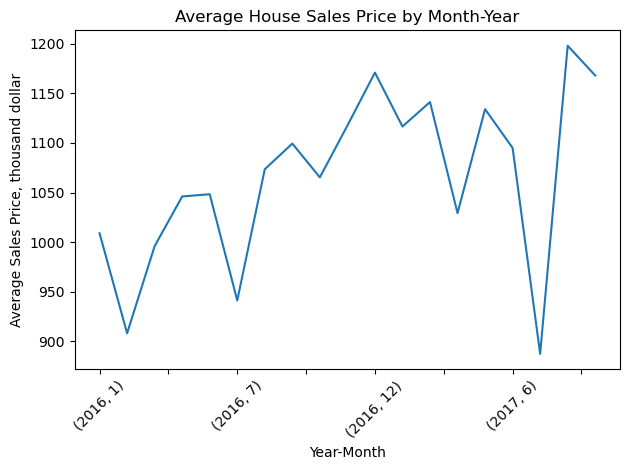

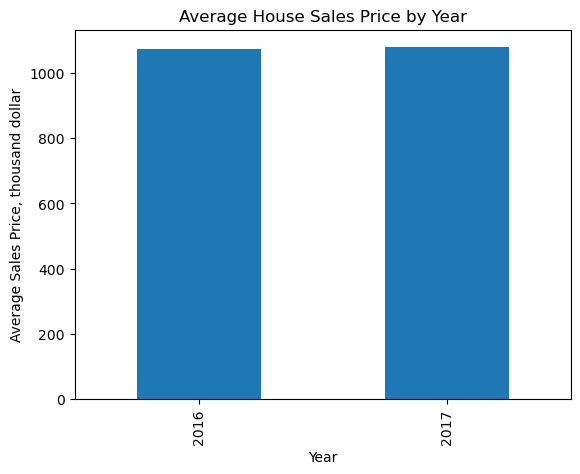

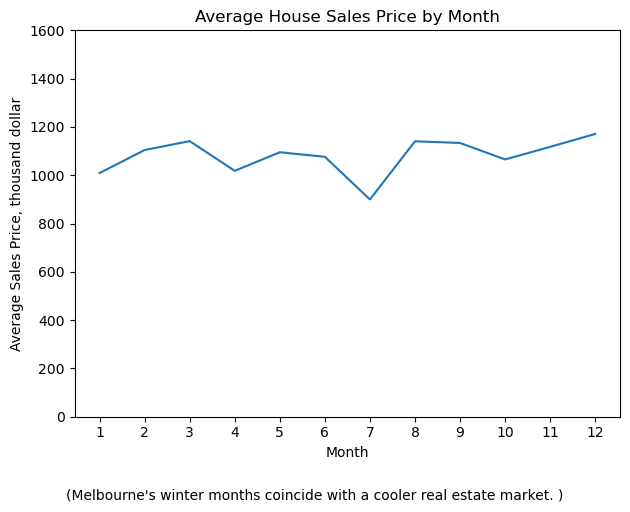

In [13]:
#EDA
import matplotlib.pyplot as plt
df['Price_aj']=df['Price']/1000

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)


df['Year'] = df['Date'].dt.year
df['MonthSold'] = df['Date'].dt.month

average_prices_by_month = df.groupby(['Year', 'MonthSold'])['Price_aj'].mean()


# Plotting by month-year
average_prices_by_month.plot(kind='line', title='Average House Sales Price by Month-Year')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price, thousand dollar')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting by year
average_prices_by_year = df.groupby('Year')['Price_aj'].mean()
average_prices_by_year.plot(kind='bar', title='Average House Sales Price by Year')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price, thousand dollar')
plt.show()

# recode "Date" variable into 12 categories by month

average_prices_by_month2 = df.groupby(['MonthSold'])['Price_aj'].mean()
average_prices_by_month2.plot(kind='line', title='Average House Sales Price by Month')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(ticks=range(1, 13))
plt.ylim(0, 1600)
plt.ylabel('Average Sales Price, thousand dollar')
plt.xlabel('Month')
txt = "(Melbourne's winter months coincide with a cooler real estate market. )"
plt.figtext(0.5, -0.05, txt, ha='center')
plt.tight_layout()
plt.show()

In [14]:
#Understand feature

#Y variable - price
pd.set_option('display.float_format', '{:.2f}'.format)
df['Price'].describe()

#other features
print(df.columns)
print(df.dtypes)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price_aj', 'Year',
       'MonthSold'],
      dtype='object')
Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           

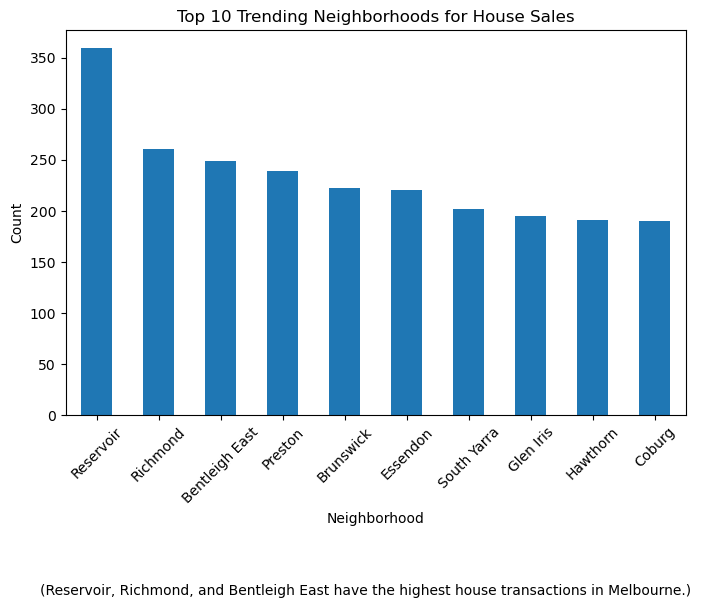

In [15]:
#neighborhood by house sale count
N = 10
top_categories = df['Suburb'].value_counts().head(N).index


df['Suburb_aj'] = df['Suburb'].where(df['Suburb'].isin(top_categories), 'Other')
filtered_counts = df['Suburb_aj'].value_counts()
filtered_counts = filtered_counts[filtered_counts.index != 'Other']

plt.figure(figsize=(8,5))
filtered_counts.plot.bar()
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Trending Neighborhoods for House Sales')
plt.xticks(rotation=45)
txt = "(Reservoir, Richmond, and Bentleigh East have the highest house transactions in Melbourne.)"
plt.figtext(0.5, -0.25, txt, ha='center')
plt.show()


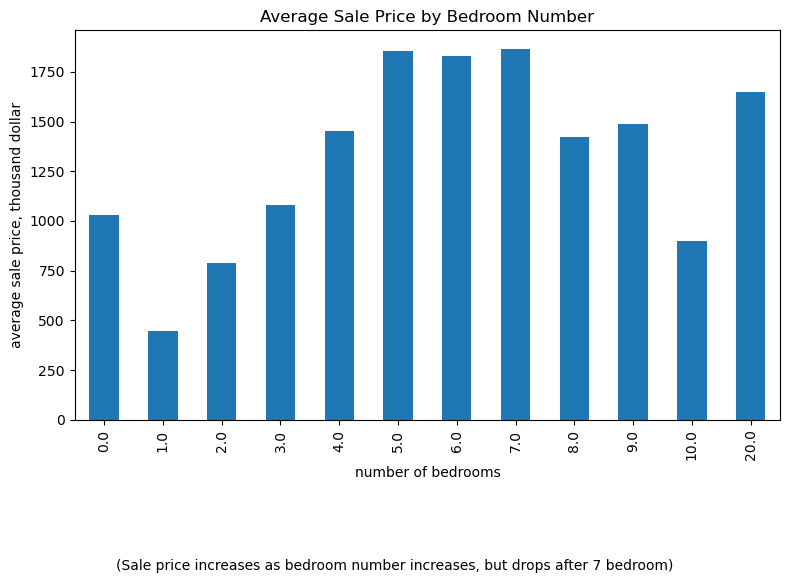

In [16]:
#sale price vs. bedroom number

avg_prices = df.groupby('Bedroom2')['Price_aj'].mean().sort_index()

avg_prices.plot(kind='bar', figsize=(8, 5))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bedrooms')
plt.title('Average Sale Price by Bedroom Number')
txt = "(Sale price increases as bedroom number increases, but drops after 7 bedroom)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()


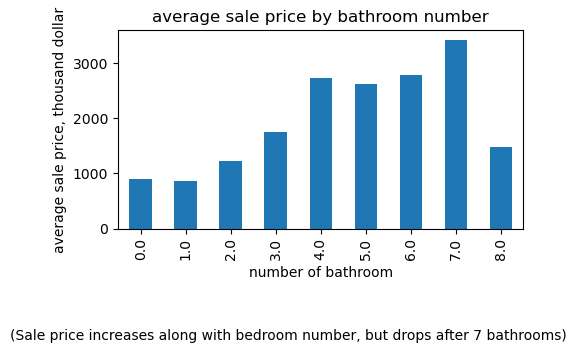

In [17]:
#sale price vs. bathroom number

avg_prices = df.groupby('Bathroom')['Price_aj'].mean().sort_index()


avg_prices.plot(kind='bar', figsize=(5, 3))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bathroom')
plt.title('average sale price by bathroom number')
txt = "(Sale price increases along with bedroom number, but drops after 7 bathrooms)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()

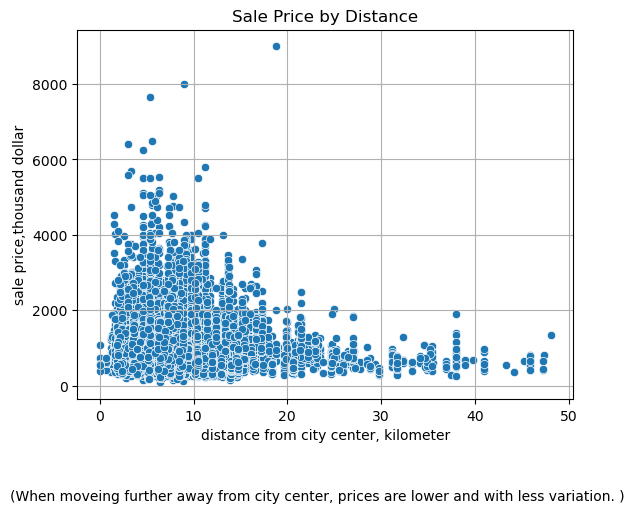

In [18]:
#sale price by distnace to city center
import seaborn as sns
sns.scatterplot(x=df['Distance'], y=df['Price_aj'])
plt.title('Sale Price by Distance')
plt.xlabel('distance from city center, kilometer')
plt.ylabel('sale price,thousand dollar')
txt = "(When moveing further away from city center, prices are lower and with less variation. )"
plt.figtext(0.5, -0.1, txt, ha='center')
plt.grid(True)
plt.show()

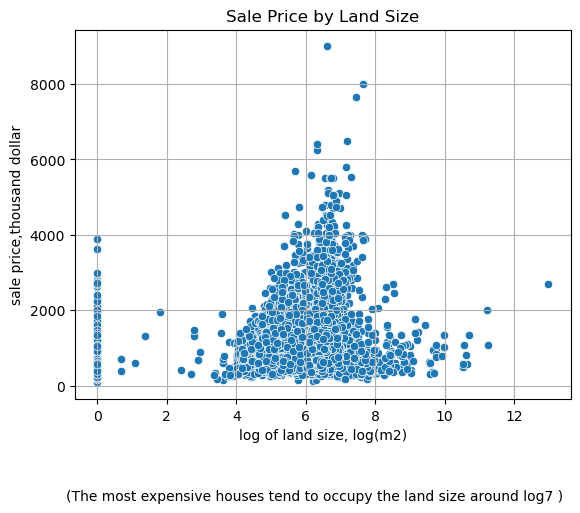

In [19]:
#Sale Price by Land Size

df['Log_Landsize'] = np.log(df['Landsize'] + 1)

sns.scatterplot(x=df['Log_Landsize'], y=df['Price_aj'])
plt.title('Sale Price by Land Size')
plt.xlabel('log of land size, log(m2)')
plt.ylabel('sale price,thousand dollar')
txt = "(The most expensive houses tend to occupy the land size around log7 )"
plt.figtext(0.5, -0.1, txt, ha='center')
plt.grid(True)
plt.show()


In [20]:
#feature correlation test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

cat_ftrs = ['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname']
num_ftrs = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Function for Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Pearson Correlation for Numerical Features
print("Pearson Correlation for Numerical Features:")
correlation_matrix = df[num_ftrs].corr(method='pearson')
print(correlation_matrix)

# Cramér's V for Categorical Features
print("\nCramér's V for Categorical Features:")
for cat_feature in cat_ftrs:
    for num_feature in num_ftrs:
        print(f"Cramér's V between {cat_feature} and {num_feature}: {cramers_v(df[cat_feature], df[num_feature])}")


# ANOVA for Categorical-Numerical Combinations
print("\nANOVA for Categorical-Numerical Combinations:")
for cat_feature in cat_ftrs:
    model = ols(f'Price ~ C({cat_feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA table for {cat_feature} and Price:\n{anova_table}\n')




Pearson Correlation for Numerical Features:
               Rooms  Distance  Bedroom2  Bathroom   Car  Landsize  \
Rooms           1.00      0.29      0.94      0.59  0.41      0.03   
Distance        0.29      1.00      0.30      0.13  0.26      0.03   
Bedroom2        0.94      0.30      1.00      0.58  0.41      0.03   
Bathroom        0.59      0.13      0.58      1.00  0.32      0.04   
Car             0.41      0.26      0.41      0.32  1.00      0.03   
Landsize        0.03      0.03      0.03      0.04  0.03      1.00   
BuildingArea    0.12      0.10      0.12      0.11  0.10      0.50   
YearBuilt      -0.07      0.25     -0.05      0.15  0.10      0.04   
Lattitude       0.02     -0.13      0.02     -0.07 -0.00      0.01   
Longtitude      0.10      0.24      0.10      0.12  0.06      0.01   
Propertycount  -0.08     -0.05     -0.08     -0.05 -0.02     -0.01   

               BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
Rooms                  0.12      -0.

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('~/Downloads/melb_data.csv')
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb']  # Groups defined by 'Suburb'


In [5]:
categorical_cols = ['Suburb', 'Type', 'Method']
numerical_cols = ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']


# Define the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine these pipelines into a single preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ], remainder='drop')

In [6]:
#baseline performance & evaluation metric:
import math

mean_price = df['Price'].mean()
baseline_predictions = [mean_price] * len(df['Price'])
squared_diff = (df['Price'] - baseline_predictions) ** 2
mse = squared_diff.mean()
rmse = math.sqrt(mse)
print("Baseline Mean Squared Error (MSE):", mse)
print("Baseline Root Mean Squared Error (RMSE):", rmse)

def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)



Baseline Mean Squared Error (MSE): 408688105130.5178
Baseline Root Mean Squared Error (RMSE): 639287.1851762069


In [7]:
#xgboost

In [9]:
from sklearn.base import clone
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GroupKFold, GroupShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline


def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
            X_other, y_other, groups_other, test_size=0.2, random_state=random_state)

        # Fit the preprocessor on the training data
        
        preprocessor_clone = clone(preprocessor)
        preprocessor_clone.fit(X_train)
        transformed_feature_names = preprocessor_clone.get_feature_names_out()

        # Transform training, validation, and test data
        X_train_transformed = preprocessor_clone.transform(X_train)
        X_val_transformed = preprocessor_clone.transform(X_val)
        X_test_transformed = preprocessor_clone.transform(X_test)

        group_kfold = GroupKFold(n_splits=n_folds)

        model = xgb.XGBRegressor(random_state=random_state)

        pipe = Pipeline([
            ('model', model)
        ])

        param_grid = {
            "model__learning_rate": [0.03],
            # "model__learning_rate": [0.03,0.05],
            "model__n_estimators": [1000],
            "model__seed": [0],
            "model__missing": [np.nan],
            "model__max_depth": [1, 3, 10, 30, 100],
            "model__colsample_bytree": [0.9],
            "model__subsample": [0.66],
            "model__early_stopping_rounds": [50], 
        }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            # verbose=2,
            # error_score='raise'
        )

        # Fit the model with the training set and use the transformed validation set for early stopping
        grid_search.fit(X_train_transformed, y_train, groups=groups_train,
                        model__eval_set=[(X_val_transformed, y_val)])
        best_rmse = grid_search.best_score_
        
        return grid_search, best_rmse, (X_test_transformed, y_test),model,transformed_feature_names


In [10]:
grid, best_rmse, (X_test_transformed, y_test), model,transformed_feature_names = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state=38, n_folds=4)
print("Best parameters:", grid.best_params_)
print("Best RMSE score:", best_rmse)

# Calculate RMSE on the test set
y_pred = grid.best_estimator_.predict(X_test_transformed)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)



[0]	validation_0-rmse:1177371.55461
[1]	validation_0-rmse:1149508.96271
[2]	validation_0-rmse:1122776.28385
[0]	validation_0-rmse:1177796.59724
[3]	validation_0-rmse:1096575.72436
[4]	validation_0-rmse:1071737.88785
[1]	validation_0-rmse:1150063.69139
[5]	validation_0-rmse:1047677.93064
[0]	validation_0-rmse:1176087.59542
[2]	validation_0-rmse:1123424.46765
[0]	validation_0-rmse:1173966.62710
[6]	validation_0-rmse:1024546.97434
[3]	validation_0-rmse:1097712.99427
[1]	validation_0-rmse:1146761.49784
[7]	validation_0-rmse:1001908.21975
[4]	validation_0-rmse:1072968.58302
[0]	validation_0-rmse:1175683.77350
[0]	validation_0-rmse:1175972.66423
[8]	validation_0-rmse:980369.90189
[2]	validation_0-rmse:1118210.75817
[0]	validation_0-rmse:1178098.88583
[5]	validation_0-rmse:1048760.78632
[1]	validation_0-rmse:1142576.30838
[3]	validation_0-rmse:1091029.75224
[9]	validation_0-rmse:959475.16712
[0]	validation_0-rmse:1175764.13232
[6]	validation_0-rmse:1025869.15237
[1]	validation_0-rmse:1151136.

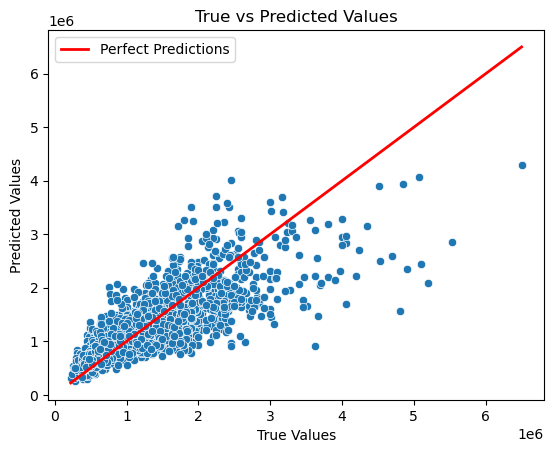

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#true vs. predicted value
sns.scatterplot(x=y_test, y=y_pred)


plt.xlabel('True Values')  
plt.ylabel('Predicted Values') 
plt.title('True vs Predicted Values') 

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Predictions')

plt.legend()

plt.savefig('mel7/true_pred.png')
plt.show()


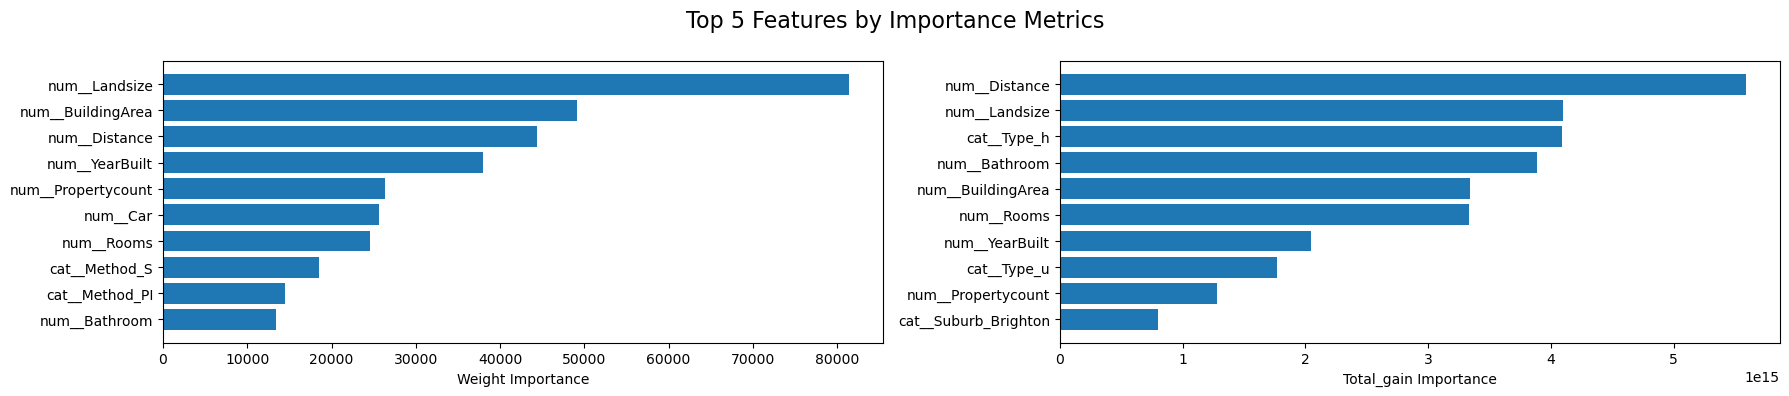

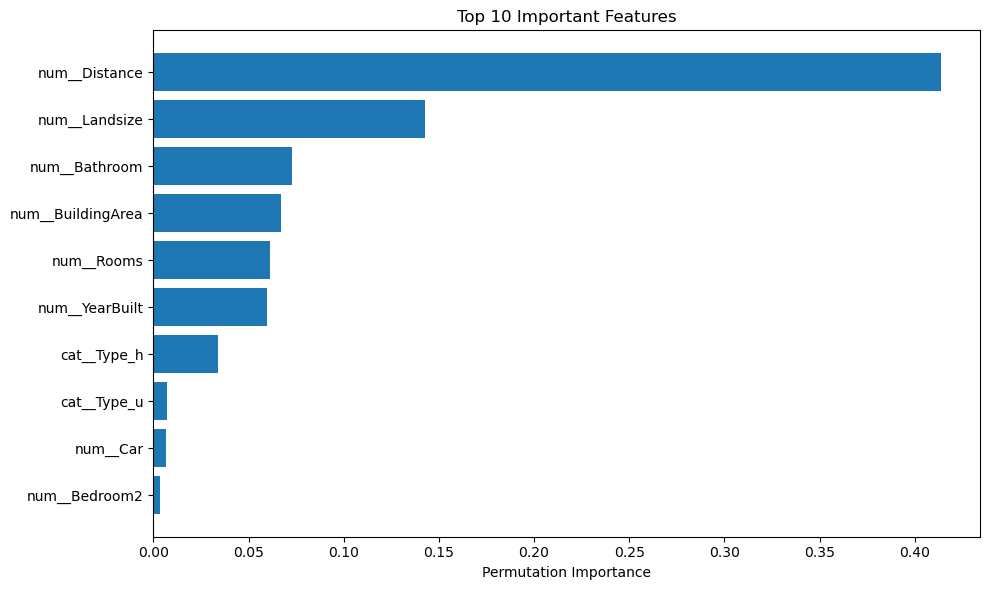

In [16]:
#Global Importance
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

transformed_feature_names = list(map(str, transformed_feature_names))
fitted_model = grid.best_estimator_.named_steps['model']
fitted_model.get_booster().feature_names = transformed_feature_names


# XGB
#importance_type_list = ['weight', 'gain', 'total_gain', 'cover', 'total_cover']
importance_type_list = ['weight', 'total_gain']
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
fig.suptitle('Top 5 Features by Importance Metrics', fontsize=16)

for i, importance_type in enumerate(importance_type_list):
    # Use the fitted model from the grid search
    fitted_model = grid.best_estimator_.named_steps['model']
    get_booster = fitted_model.get_booster()
    importance_values = get_booster.get_score(importance_type=importance_type)
    sorted_importance = sorted(importance_values.items(), key=lambda x: x[1], reverse=True)[:10]
    feature_names, feature_scores = zip(*sorted_importance)
    
    # No need to convert feature names, use them directly
    axes[i].barh(range(10), feature_scores, align='center')
    axes[i].set_yticks(range(10))
    axes[i].set_yticklabels(feature_names)
    axes[i].set_xlabel(importance_type.capitalize() + ' Importance')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('mel7/impt1.png')
plt.show()



# Permutation feature importance
all_ftrs = permutation_importance(fitted_model, X_test_transformed, y_test)  # Use fitted_model

ftr_importance = all_ftrs.importances_mean
ftr_index = np.argsort(ftr_importance)[::-1]

top_ftr_index = ftr_index[:10]
top_ftrs = [transformed_feature_names[idx] for idx in top_ftr_index]
top_ftr_importance = ftr_importance[top_ftr_index]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_ftr_importance, align='center')
plt.yticks(range(10), top_ftrs)
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('mel7/impt2.png')
plt.show()



In [ ]:
#local importance
import shap
best_model = grid.best_estimator_.named_steps['model']
explainer = shap.Explainer(best_model)

indices = [3, 100]
selected_data = X_test_transformed[indices, :]

shap_values = explainer.shap_values(selected_data, check_additivity=False)


for i, index in enumerate(indices):
    shap_plot = shap.force_plot(explainer.expected_value, shap_values[i, :], selected_data[i, :], matplotlib=False)
    shap.save_html(f"shap_force_plot_{index}.png", shap_plot)


In [124]:
#XGBoost with different iteration
from sklearn.utils import shuffle

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    # Reshuffle the entire dataset
    X, y, groups = shuffle(X, y, groups, random_state=random_state)

    splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
            X_other, y_other, groups_other, test_size=0.2, random_state=random_state)

        preprocessor_clone = clone(preprocessor)
        preprocessor_clone.fit(X_train)


        X_train_transformed = preprocessor_clone.transform(X_train)
        X_val_transformed = preprocessor_clone.transform(X_val)
        X_test_transformed = preprocessor_clone.transform(X_test)

        group_kfold = GroupKFold(n_splits=n_folds)

        model = xgb.XGBRegressor(random_state=random_state)

        pipe = Pipeline([
            ('model', model)
        ])

        param_grid = {
            "model__learning_rate": [0.03,0.05],
            "model__n_estimators": [1000],
            "model__seed": [0],
            "model__missing": [np.nan],
            "model__max_depth": [1, 3, 10, 30, 100],
            "model__colsample_bytree": [0.9],
            "model__subsample": [0.66],
            "model__early_stopping_rounds": [100], 
        }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            # verbose=2,
            # error_score='raise'
        )


        grid_search.fit(X_train_transformed, y_train, groups=groups_train,
                        model__eval_set=[(X_val_transformed, y_val)])
        best_rmse = grid_search.best_score_
        best_params = grid_search.best_params_

        return grid_search, best_rmse,best_params,(X_test_transformed, y_test)

results = []
for random_state in [38, 42, 55, 64]:
    grid, best_rmse, best_params, (X_test_transformed, y_test) = ML_pipeline_groups_GridSearchCV(
        X, y, groups, random_state, n_folds=4)
    
    y_pred = grid.best_estimator_.predict(X_test_transformed)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((random_state, best_rmse, test_rmse, best_params))


for result in results:
    print(f"Random State: {result[0]}, Best RMSE: {result[1]}, Test RMSE: {result[2]}, Best Params: {result[3]}")


[0]	validation_0-rmse:1180556.59004
[0]	validation_0-rmse:1178925.63330
[0]	validation_0-rmse:1181026.58940
[1]	validation_0-rmse:1153360.04321
[0]	validation_0-rmse:1178827.70030
[0]	validation_0-rmse:1180246.33226
[1]	validation_0-rmse:1152077.65460
[0]	validation_0-rmse:1181142.17361
[2]	validation_0-rmse:1126831.48220
[1]	validation_0-rmse:1153734.96706
[1]	validation_0-rmse:1151515.52402
[1]	validation_0-rmse:1148942.23353
[0]	validation_0-rmse:1179831.56103
[3]	validation_0-rmse:1100994.38988
[2]	validation_0-rmse:1127862.09173
[0]	validation_0-rmse:1181913.93314
[4]	validation_0-rmse:1076053.58201
[1]	validation_0-rmse:1148115.05918
[2]	validation_0-rmse:1124041.26109
[2]	validation_0-rmse:1124783.23270
[3]	validation_0-rmse:1102769.59906
[1]	validation_0-rmse:1155057.70720
[3]	validation_0-rmse:1097511.20172
[5]	validation_0-rmse:1052219.33991
[2]	validation_0-rmse:1121793.52978
[1]	validation_0-rmse:1149718.79189
[4]	validation_0-rmse:1078148.70141
[2]	validation_0-rmse:112944

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


[288]	validation_0-rmse:338224.03465
[302]	validation_0-rmse:299897.44060
[309]	validation_0-rmse:316895.29644
[256]	validation_0-rmse:350872.56450
[216]	validation_0-rmse:337861.90478
[48]	validation_0-rmse:356214.15540
[303]	validation_0-rmse:299841.23180
[310]	validation_0-rmse:316896.01558
[257]	validation_0-rmse:350838.43792
[217]	validation_0-rmse:337878.65315
[304]	validation_0-rmse:299963.62186
[311]	validation_0-rmse:316837.88455
[258]	validation_0-rmse:350836.02157
[218]	validation_0-rmse:337982.43730
[312]	validation_0-rmse:316881.86672
[305]	validation_0-rmse:299917.50148
[259]	validation_0-rmse:350827.37207
[49]	validation_0-rmse:354692.67050
[219]	validation_0-rmse:337968.28789
[260]	validation_0-rmse:350819.92383
[306]	validation_0-rmse:299971.32072
[313]	validation_0-rmse:316896.82478
[220]	validation_0-rmse:337944.30958
[338]	validation_0-rmse:335158.76768
[289]	validation_0-rmse:338222.55010
[261]	validation_0-rmse:350805.59352
[307]	validation_0-rmse:299945.84722
[31

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


[116]	validation_0-rmse:354131.98386
[9]	validation_0-rmse:834568.54220
[421]	validation_0-rmse:313308.90634
[29]	validation_0-rmse:439778.58909
[422]	validation_0-rmse:313309.26292
[10]	validation_0-rmse:802136.96301
[423]	validation_0-rmse:313446.72368
[48]	validation_0-rmse:360858.51277
[30]	validation_0-rmse:430038.53358
[424]	validation_0-rmse:313381.62935
[117]	validation_0-rmse:354195.56528
[131]	validation_0-rmse:326142.94183
[11]	validation_0-rmse:771644.07199
[425]	validation_0-rmse:313395.74521
[49]	validation_0-rmse:359779.06273
[426]	validation_0-rmse:313381.27220
[31]	validation_0-rmse:421822.84741
[12]	validation_0-rmse:742778.60708
[427]	validation_0-rmse:313365.14931
[118]	validation_0-rmse:354217.89626
[132]	validation_0-rmse:326182.43636
[428]	validation_0-rmse:313365.80673
[32]	validation_0-rmse:414241.68588
[13]	validation_0-rmse:715487.06394
[429]	validation_0-rmse:313405.42497
[50]	validation_0-rmse:358870.98444
[430]	validation_0-rmse:313416.09974
[119]	validati

In [125]:
########

In [126]:
import pandas as pd
df = pd.read_csv('~/Downloads/melb_data.csv')
print(df.columns)
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb']  

random_states=[38,42, 55, 64]

def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [127]:
#preprocessing
categorical_cols = ['Suburb', 'Type', 'Method']
numerical_cols = ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ], remainder='drop')

In [130]:
# Regression Lasso- test different iterations

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        model = Lasso(max_iter=500, tol=1e-3)
        imputer = IterativeImputer(estimator = LinearRegression(), max_iter=500, random_state=random_state)
        
 
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor), 
            ('imputer', imputer),
            ('regressor', model)
        ])
        
        param_grid = {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 1500, 2000]}

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


Fitting 4 folds for each of 11 candidates, totalling 44 fits


/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e+14, tolerance: 3.153e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+14, tolerance: 3.153e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Best parameters: {'regressor__alpha': 1}
Best score: -496626.9259276893
Test score: 520355.230055812
Fitting 4 folds for each of 11 candidates, totalling 44 fits


/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+14, tolerance: 3.476e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+14, tolerance: 3.476e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Best parameters: {'regressor__alpha': 2000}
Best score: -493388.57687583455
Test score: 457904.21866778797
Fitting 4 folds for each of 11 candidates, totalling 44 fits


/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.017e+14, tolerance: 3.460e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+14, tolerance: 3.553e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Best parameters: {'regressor__alpha': 2000}
Best score: -484887.7850837171
Test score: 586870.323324356
Fitting 4 folds for each of 11 candidates, totalling 44 fits


/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.917e+14, tolerance: 3.268e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+14, tolerance: 3.335e+12
  model = cd_fast.enet_coordinate_descent(
/Users/yitong/anaconda3/envs/ds1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Best parameters: {'regressor__alpha': 2000}
Best score: -487671.60621795687
Test score: 472861.2069401903
Random State: 38
Evaluation Score: -496626.9259276893
Test Score: 520355.230055812
Random State: 42
Evaluation Score: -493388.57687583455
Test Score: 457904.21866778797
Random State: 55
Evaluation Score: -484887.7850837171
Test Score: 586870.323324356
Random State: 64
Evaluation Score: -487671.60621795687
Test Score: 472861.2069401903


In [131]:
#regression -elastic net

In [132]:
#regression -elastic net

from sklearn.linear_model import ElasticNet  

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        imputer = IterativeImputer(estimator = LinearRegression(), max_iter=500, random_state=random_state)
        model = ElasticNet(max_iter=500, tol=1e-3)  
        
        
        pipe = Pipeline([
            ('preprocessor', preprocessor),  
            ('imputer', imputer),
            ('model', RandomForestRegressor(random_state=random_state))
            
        ])
        param_grid = {
            'regressor__alpha': [0.1, 1, 10, 100, 500, 1000, 1500, 2000],
            'regressor__l1_ratio': [0.01,0.05,0.1, 0.3, 0.5, 0.8] }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:29:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 1500, 'regressor__l1_ratio': 0.01}
Best score: -411236.22394925426
Test score: 441826.51661813556
Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:33:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 2000, 'regressor__l1_ratio': 0.01}
Best score: -438416.62148405355
Test score: 392553.96017076477
Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:37:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 1, 'regressor__l1_ratio': 0.01}
Best score: -425965

In [133]:
#random forest


In [134]:
# Random forest

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        imputer = IterativeImputer(estimator = RandomForestRegressor(), max_iter=500, random_state=random_state)
        model = RandomForestRegressor()
       
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        param_grid = {
            'regressor__n_estimators': [10, 100, 500, 1000,1500],
            'regressor__max_depth': [50, 100, 150, 500, 1000, 1500,2000],
        }


        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV] END .............................regressor__alpha=0.001; total time=   1.7s
[CV] END ...............................regressor__alpha=0.1; total time=   1.5s
[CV] END ................................regressor__alpha=10; total time=   1.2s
[CV] END ...............................regressor__alpha=100; total time=   0.4s
[CV] END ...............................regressor__alpha=500; total time=   0.2s
[CV] END ..............................regressor__alpha=1500; total time=   0.1s
[CV] END ..............................regressor__alpha=2000; total time=   0.1s
[CV] END .............................regressor__alpha=0.001; total time=   1.3s
[CV] END ..............................regressor__alpha=0.01; total time=   1.3s
[CV] END .................................regressor__alpha=1; total time=   1.6s
[CV] END ...............................regressor__alpha=100; total time=   0.3s
[CV] END ...............................regress

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


 "l1_ratio" } are not used.

[CV] END ......regressor__alpha=10, regressor__l1_ratio=0.01; total time=  32.7s
[01:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

[CV] END .......regressor__alpha=10, regressor__l1_ratio=0.1; total time=   6.2s
[01:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

[CV] END .......regressor__alpha=10, regressor__l1_ratio=0.5; total time=   8.3s
[01:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

[CV] END .....regressor__alpha=100, regressor__l1_ratio=0.01; total time=   6.3s
[01:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

[CV] END ......regressor__alpha=100, regres

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Best parameters: {'regressor__max_depth': 500, 'regressor__n_estimators': 500}
Best score: -452721.5851534273
Test score: 416547.3025954825
Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV] END regressor__max_depth=2000, regressor__n_estimators=1500; total time= 4.0min
[CV] END regressor__max_depth=50, regressor__n_estimators=100; total time=  55.2s
[CV] END regressor__max_depth=50, regressor__n_estimators=1000; total time= 2.0min
[CV] END regressor__max_depth=100, regressor__n_estimators=10; total time=   1.2s
[CV] END regressor__max_depth=100, regressor__n_estimators=10; total time=   1.3s
[CV] END regressor__max_depth=100, regressor__n_estimators=100; total time=   8.6s
[CV] END regressor__max_depth=100, regressor__n_estimators=500; total time=  39.8s
[CV] END regressor__max_depth=100, regressor__n_estimators=1000; total time= 1.4min
[CV] END regressor__max_depth=150, regressor__n_estimators=100; total time=   8.8s
[CV] END regressor__max_depth=150, regressor__n_est

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


[CV] END regressor__max_depth=100, regressor__n_estimators=10; total time=   0.8s
[CV] END regressor__max_depth=100, regressor__n_estimators=100; total time=   7.9s
[CV] END regressor__max_depth=100, regressor__n_estimators=500; total time= 1.0min
[CV] END regressor__max_depth=100, regressor__n_estimators=1000; total time= 2.3min
[CV] END regressor__max_depth=150, regressor__n_estimators=100; total time=   8.0s
[CV] END regressor__max_depth=150, regressor__n_estimators=500; total time=  49.1s
[CV] END regressor__max_depth=150, regressor__n_estimators=1000; total time= 2.2min
[CV] END regressor__max_depth=500, regressor__n_estimators=500; total time=  59.2s
[CV] END regressor__max_depth=500, regressor__n_estimators=1000; total time= 1.8min
[CV] END regressor__max_depth=1000, regressor__n_estimators=100; total time=  43.1s
[CV] END regressor__max_depth=1000, regressor__n_estimators=500; total time=  60.0s
[CV] END regressor__max_depth=1000, regressor__n_estimators=1500; total time= 2.3mi

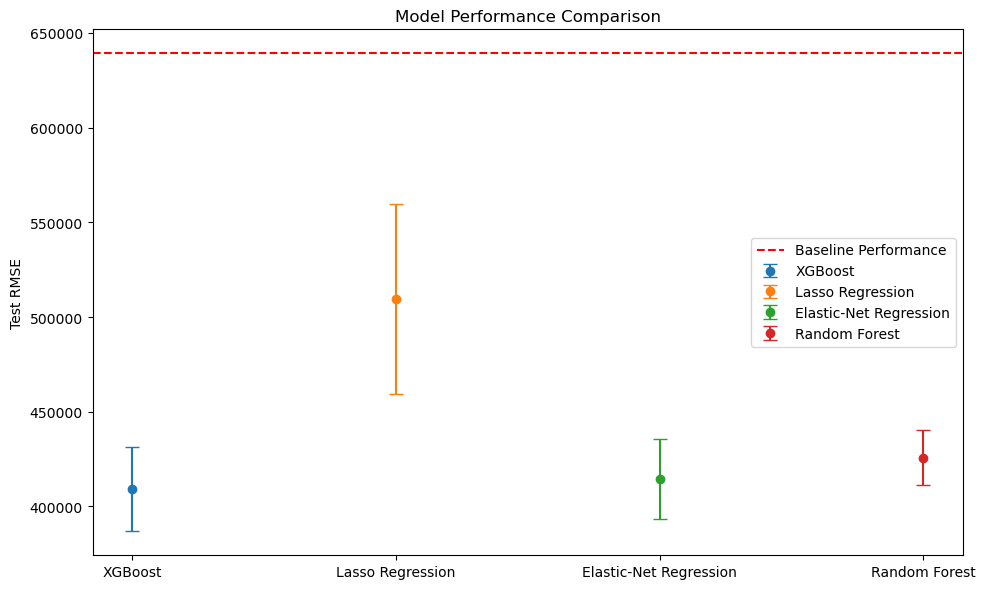

In [140]:
#model comparison 12/6

results_xgb = [(38, 439012.0204934638), (42, 387787.5766376659), (55, 387559.7852241038), (64, 422113.4137911719)]
test_rmses_xgb = [result[1] for result in results_xgb]
mean_test_rmse_xgb = np.mean(test_rmses_xgb)
std_test_rmse_xgb = np.std(test_rmses_xgb)

results_la = [(38, 520355.230055812), (42, 457904.21866778797), (55, 586870.323324356), (64, 472861.2069401903)]
test_rmses_la = [result[1] for result in results_la]
mean_test_rmse_la = np.mean(test_rmses_la)
std_test_rmse_la = np.std(test_rmses_la)

results_ela = [(38, 441826.51661813556), (42, 392553.96017076477), (55, 395087.3150522636), (64, 428690.78564080765)]
test_rmses_ela = [result[1] for result in results_ela]
mean_test_rmse_ela = np.mean(test_rmses_ela)
std_test_rmse_ela = np.std(test_rmses_ela)

results_rf = [(38, 450913.5456574431), (42, 416547.3025954825), (55, 417036.26749794354), (64, 418682.3928374486)]
test_rmses_rf = [result[1] for result in results_rf]
mean_test_rmse_rf = np.mean(test_rmses_rf)
std_test_rmse_rf = np.std(test_rmses_rf)


models = ['XGBoost', 'Lasso Regression', 'Elastic-Net Regression', 'Random Forest']
means = [mean_test_rmse_xgb, mean_test_rmse_la, mean_test_rmse_ela, mean_test_rmse_rf]
stds = [std_test_rmse_xgb, std_test_rmse_la, std_test_rmse_ela, std_test_rmse_rf]
x_pos = np.arange(len(models))
baseline = 639287.1851762069

#plotting
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.errorbar(x_pos[i], means[i], yerr=stds[i], fmt='o', capsize=5, label=models[i])


plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline Performance')


plt.xticks(x_pos, models)
plt.ylabel('Test RMSE')
plt.title('Model Performance Comparison')
plt.legend()



plt.tight_layout()
plt.savefig('mel7/model_comparison_6.pdf')
plt.show()

